In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
print(sklearn.__version__)

1.3.2


In [3]:
data= pd.read_csv("Housing.csv")

In [4]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.shape

(545, 13)

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
data.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [10]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
features= [i for i in data.columns if i not in ["price"]]
print(features)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x400 with 0 Axes>

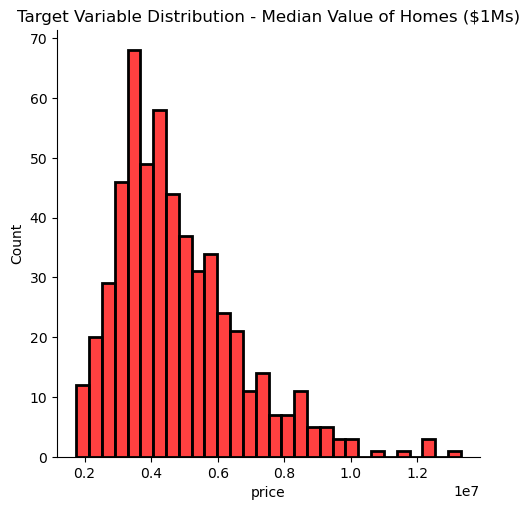

In [13]:
plt.figure(figsize=[8,4])
sns.displot(data["price"], color='r', edgecolor="black", linewidth=2, bins=30)
plt.title("Target Variable Distribution - Median Value of Homes ($1Ms)")
plt.show

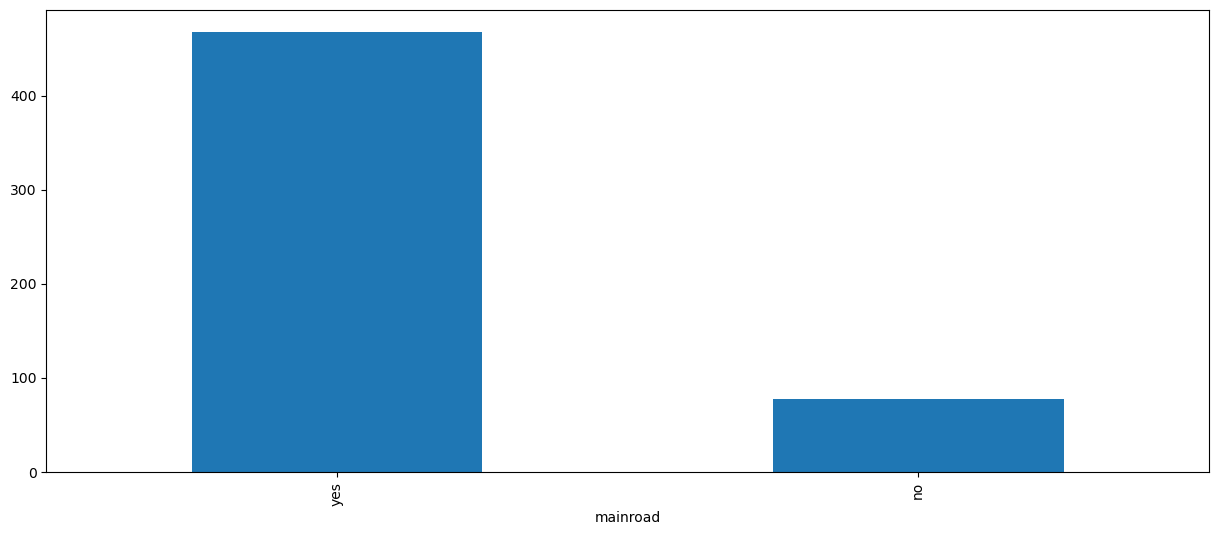

In [14]:
plt.figure(figsize=[15,6])
plt_mainroad=data["mainroad"].value_counts().plot(kind="bar")
plt.show()

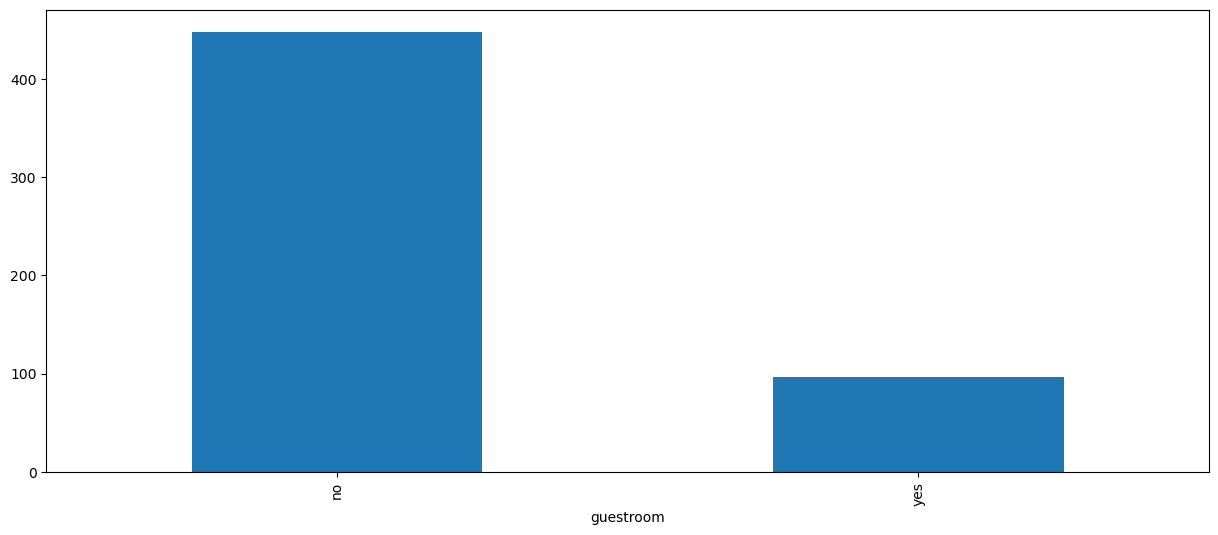

In [15]:
plt.figure(figsize=[15,6])
plt_guestroom=data["guestroom"].value_counts().plot(kind="bar")
plt.show()

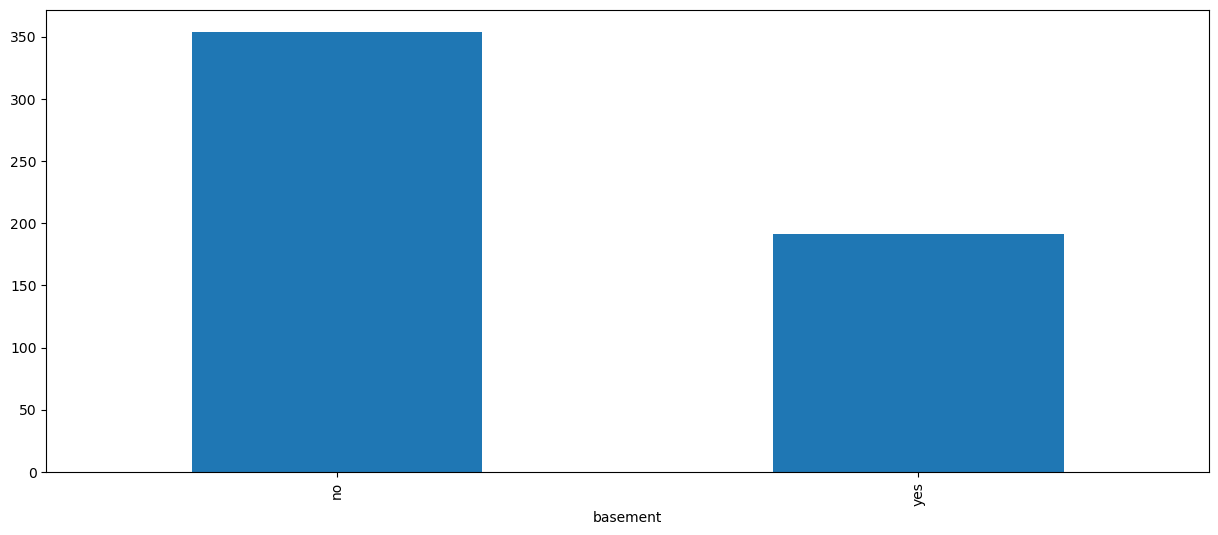

In [16]:
plt.figure(figsize=[15,6])
plt_basement=data["basement"].value_counts().plot(kind="bar")
plt.show()

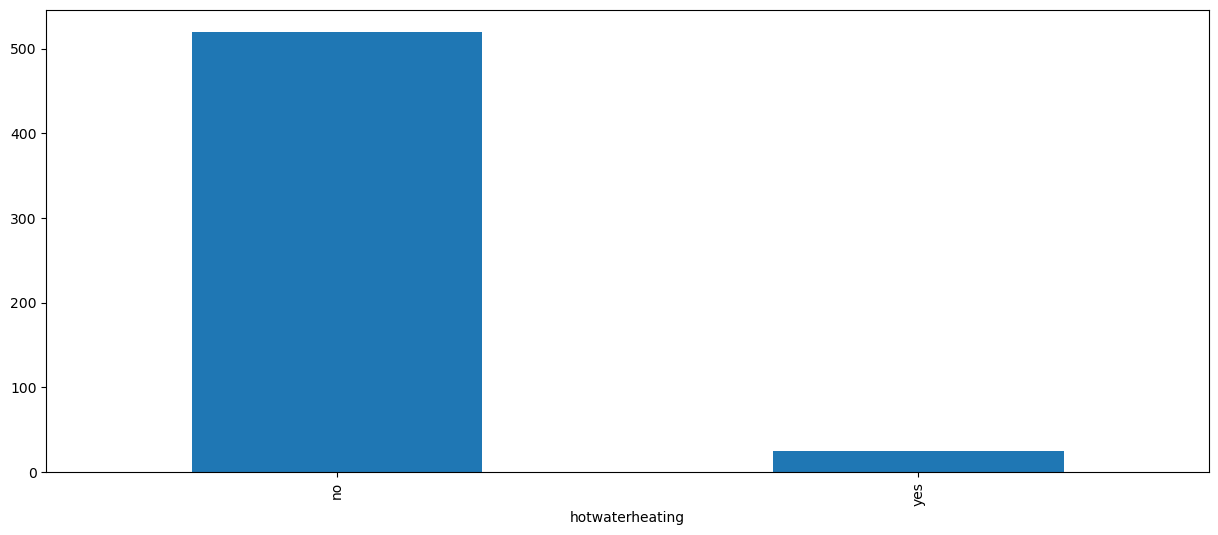

In [17]:
plt.figure(figsize=[15,6])
plt_hotwaterheating=data["hotwaterheating"].value_counts().plot(kind="bar")
plt.show()

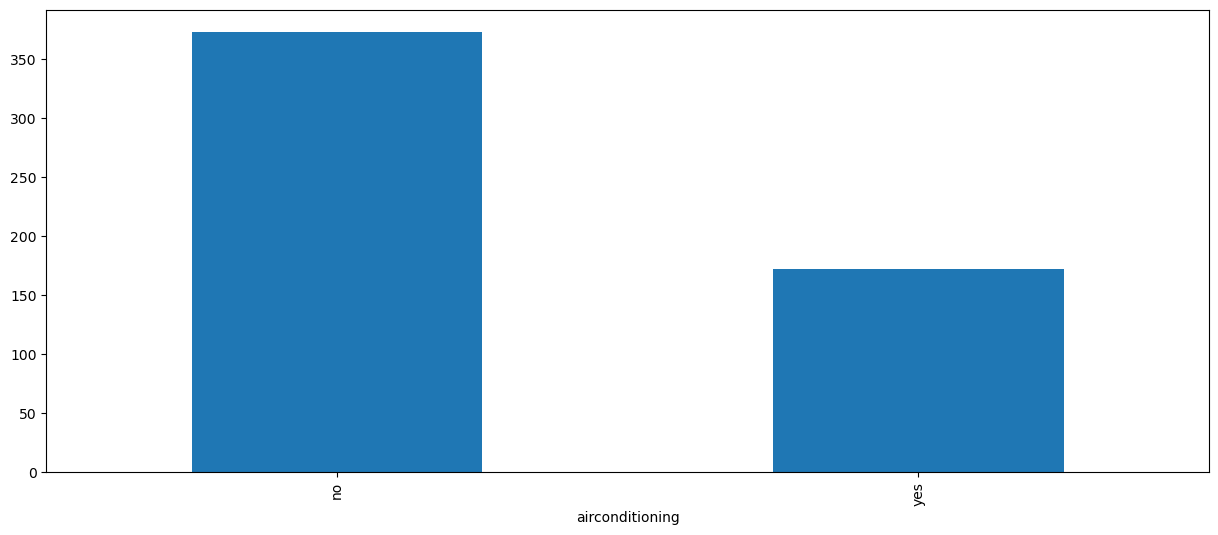

In [18]:
plt.figure(figsize=[15,6])
plt_airconditioning=data["airconditioning"].value_counts().plot(kind="bar")
plt.show()

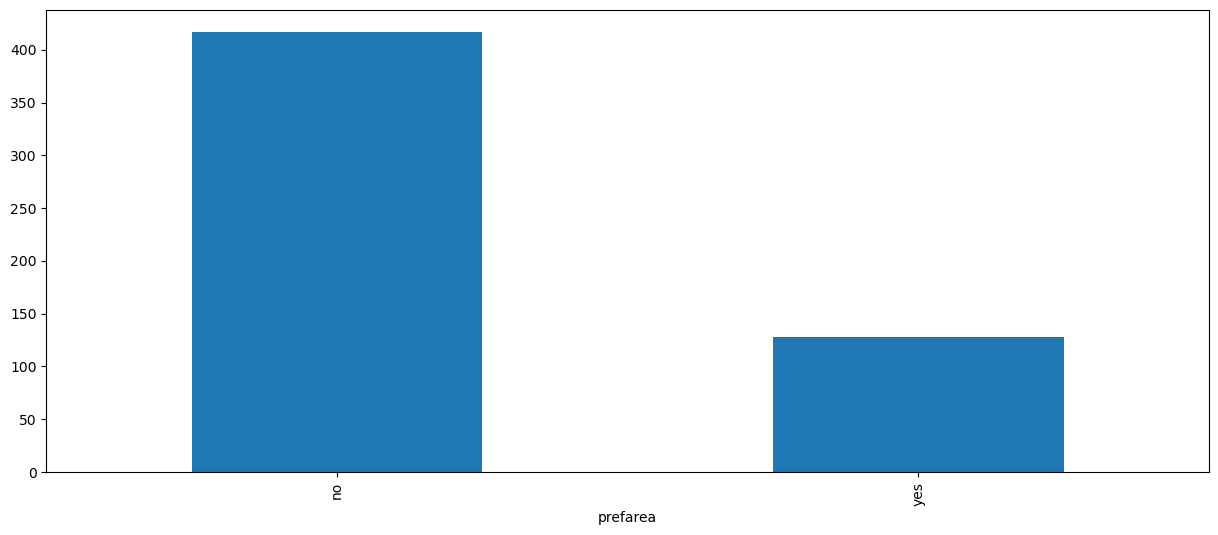

In [19]:
plt.figure(figsize=[15,6])
plt_prefarea=data["prefarea"].value_counts().plot(kind="bar")
plt.show()

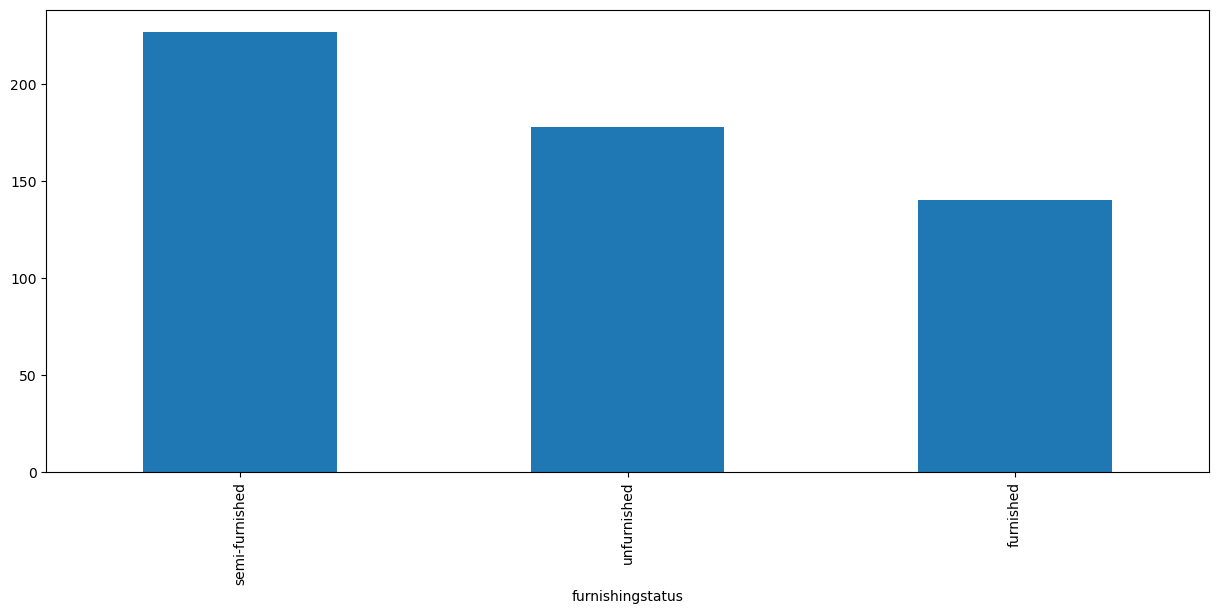

In [20]:
plt.figure(figsize=[15,6])
plt_furnishingstatus=data["furnishingstatus"].value_counts().plot(kind="bar")
plt.show()

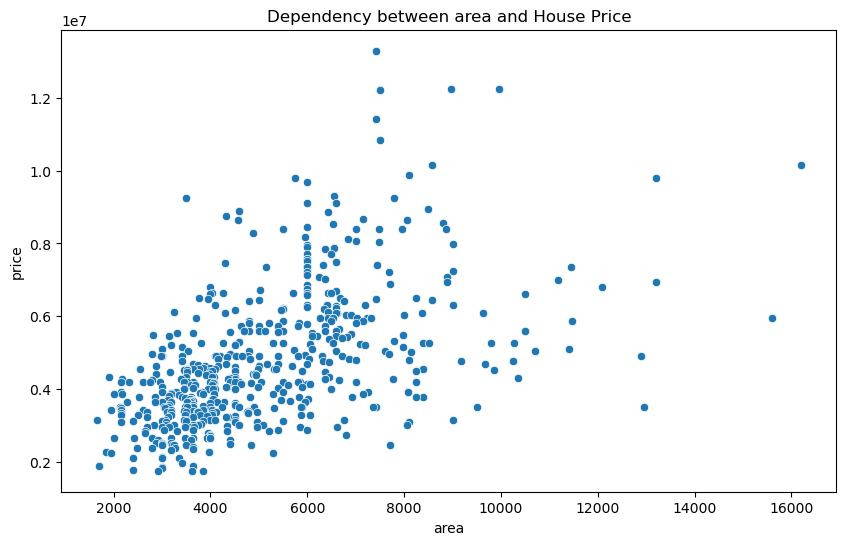

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data)
plt.title('Dependency between area and House Price')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

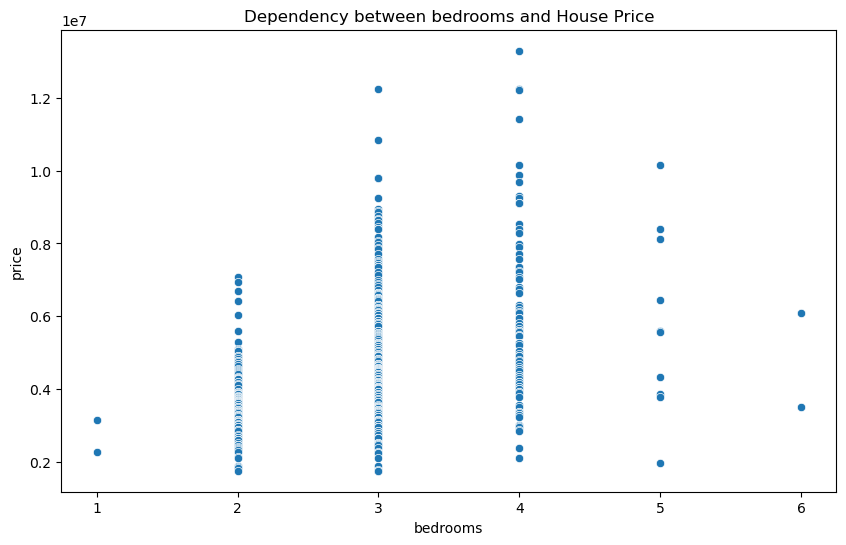

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.title('Dependency between bedrooms and House Price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

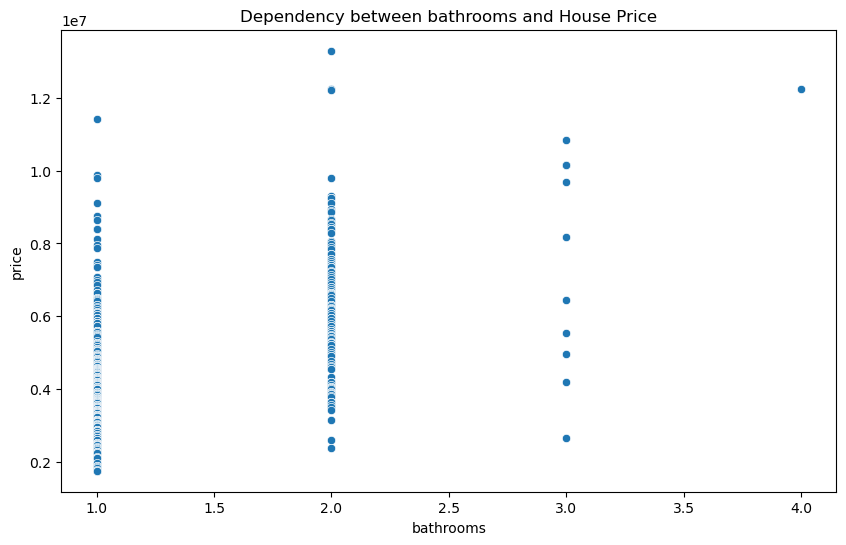

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=data)
plt.title('Dependency between bathrooms and House Price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

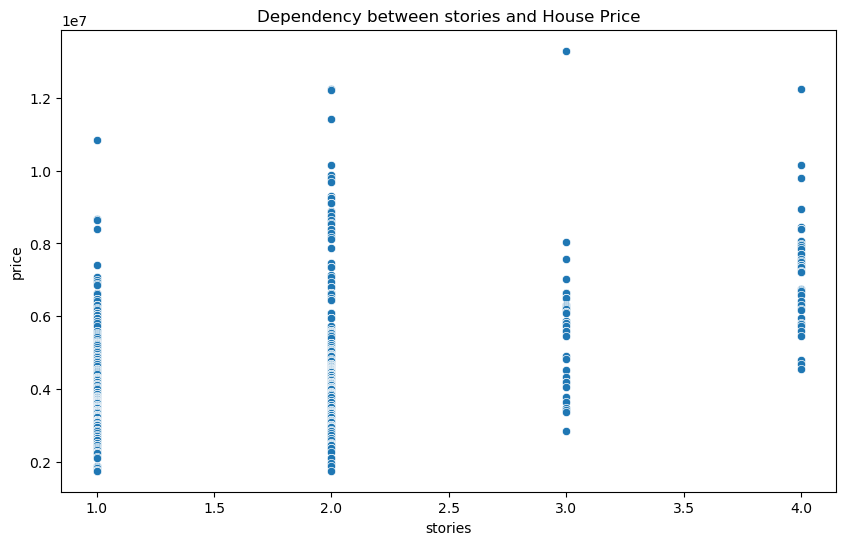

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stories', y='price', data=data)
plt.title('Dependency between stories and House Price')
plt.xlabel('stories')
plt.ylabel('price')
plt.show()

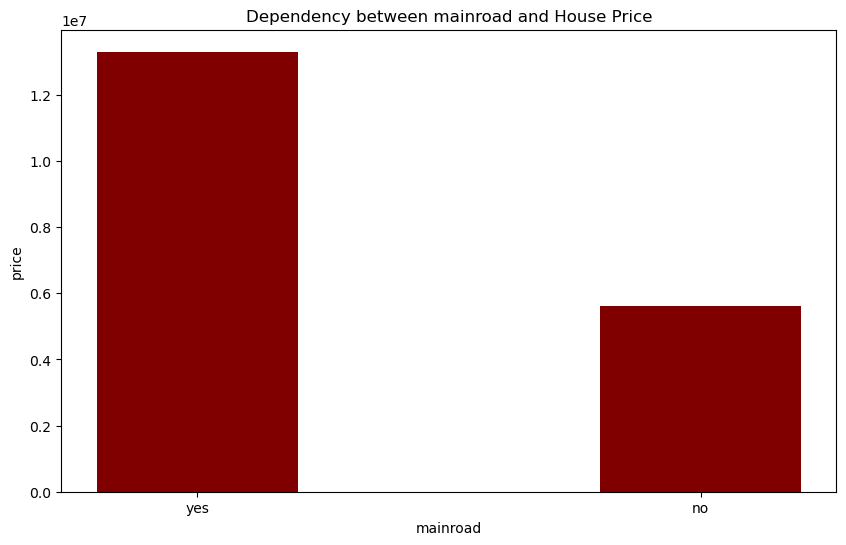

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(data["mainroad"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between mainroad and House Price')
plt.xlabel('mainroad')
plt.ylabel('price')
plt.show()

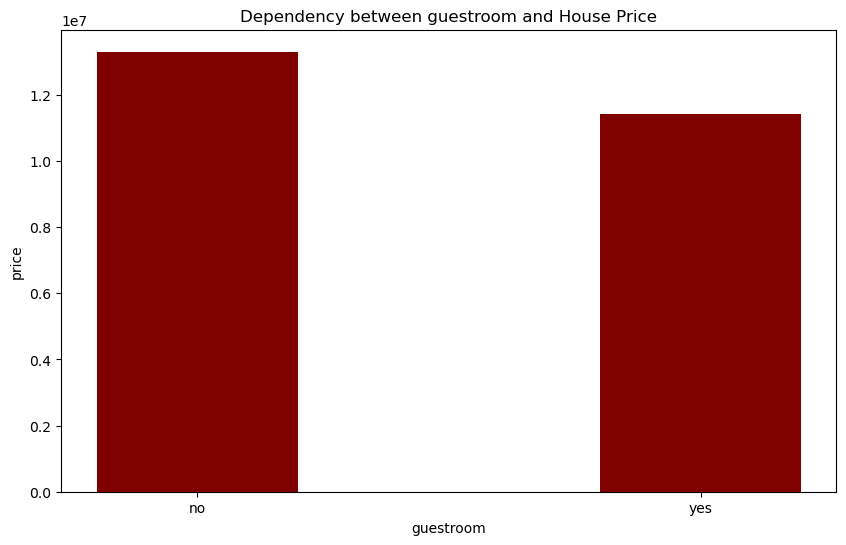

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(data["guestroom"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between guestroom and House Price')
plt.xlabel('guestroom')
plt.ylabel('price')
plt.show()

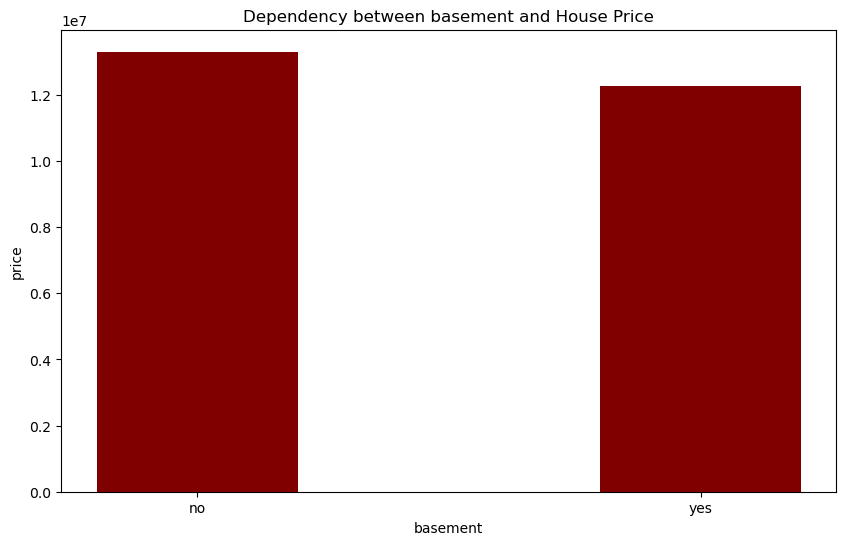

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(data["basement"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between basement and House Price')
plt.xlabel('basement')
plt.ylabel('price')
plt.show()

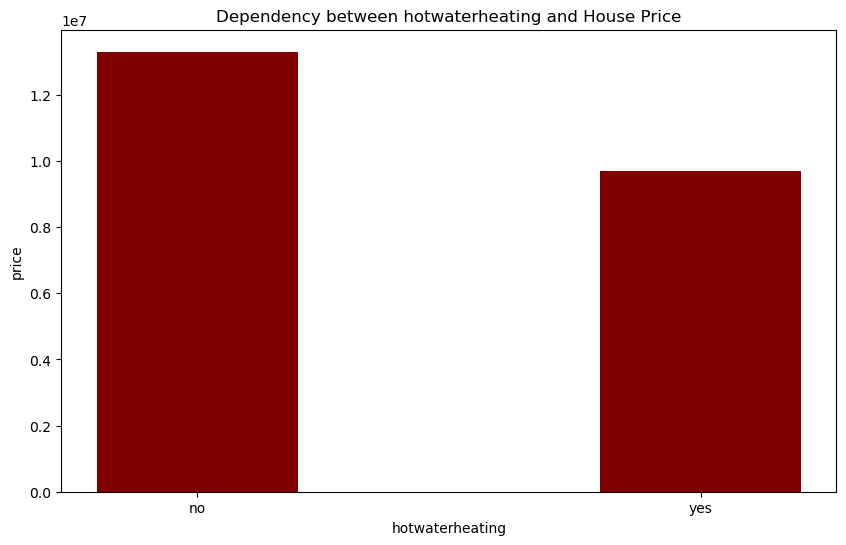

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(data["hotwaterheating"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between hotwaterheating and House Price')
plt.xlabel('hotwaterheating')
plt.ylabel('price')
plt.show()

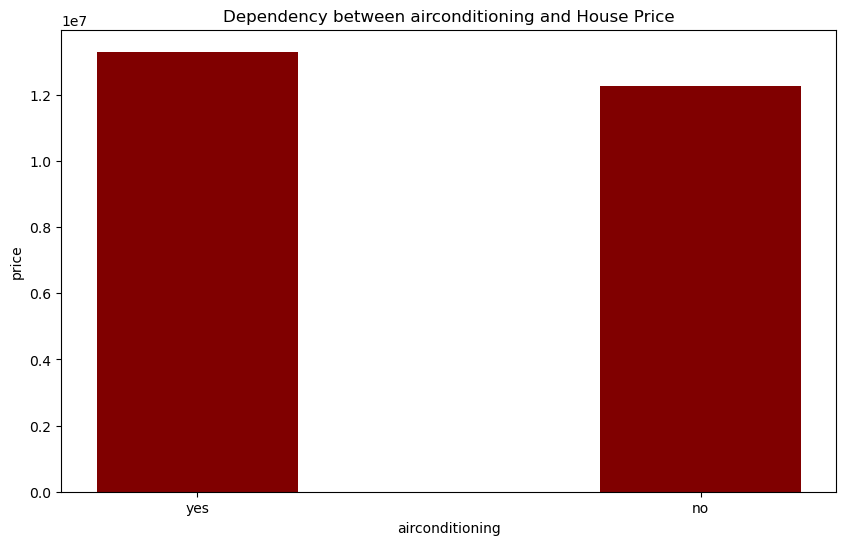

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(data["airconditioning"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between airconditioning and House Price')
plt.xlabel('airconditioning')
plt.ylabel('price')
plt.show()

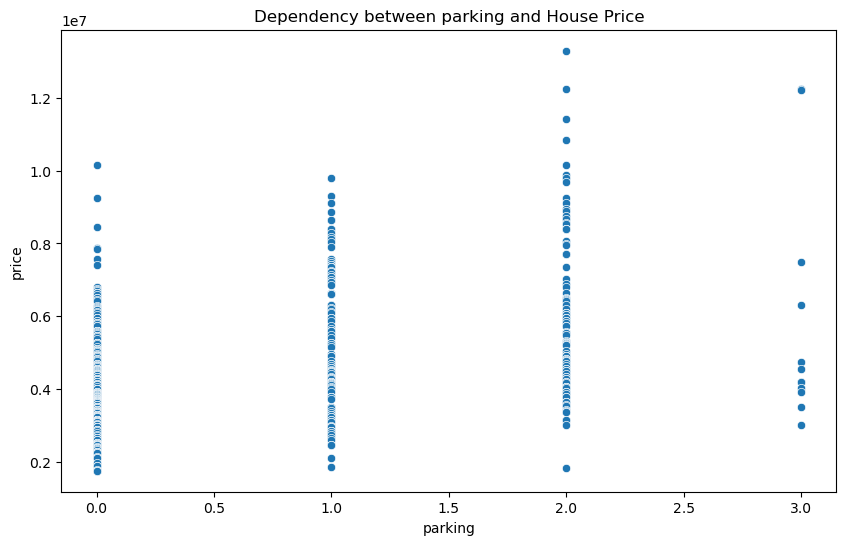

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='parking', y='price', data=data)
plt.title('Dependency between parking and House Price')
plt.xlabel('parking')
plt.ylabel('price')
plt.show()

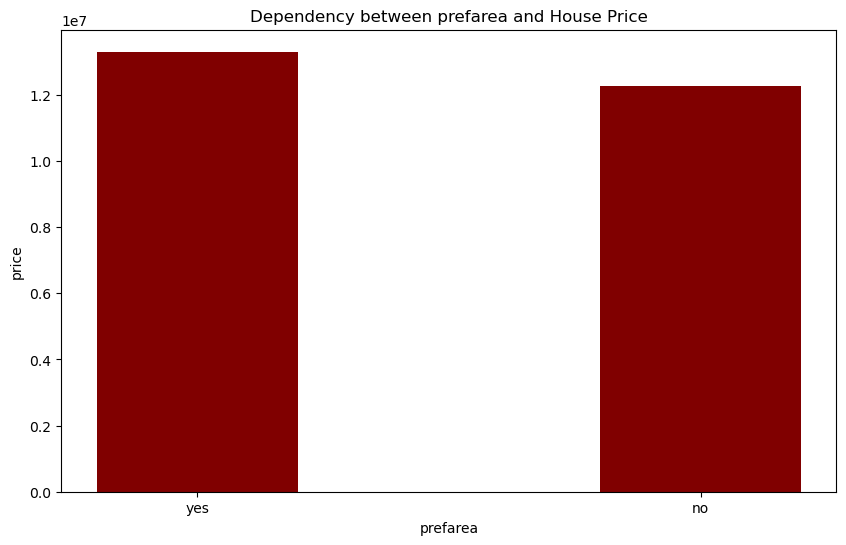

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(data["prefarea"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between prefarea and House Price')
plt.xlabel('prefarea')
plt.ylabel('price')
plt.show()

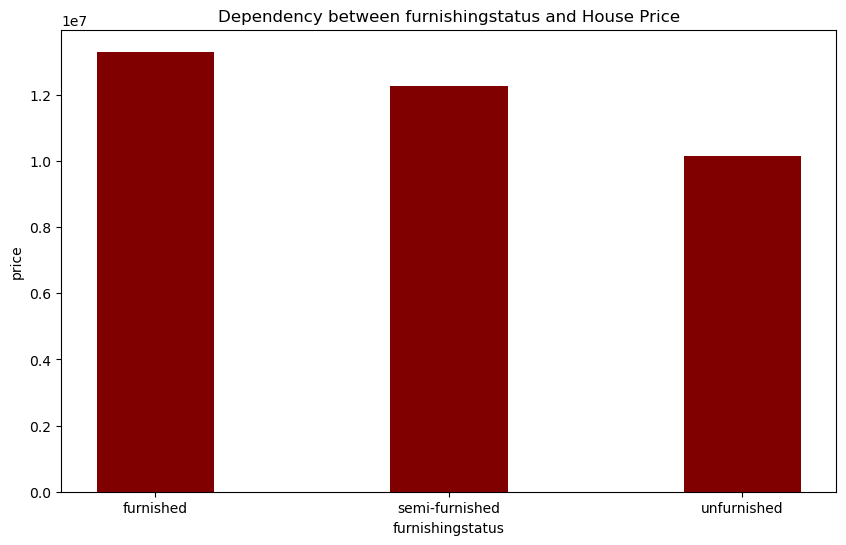

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(data["furnishingstatus"], data["price"], color ='maroon', width = 0.4)
plt.title('Dependency between furnishingstatus and House Price')
plt.xlabel('furnishingstatus')
plt.ylabel('price')
plt.show()

In [68]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


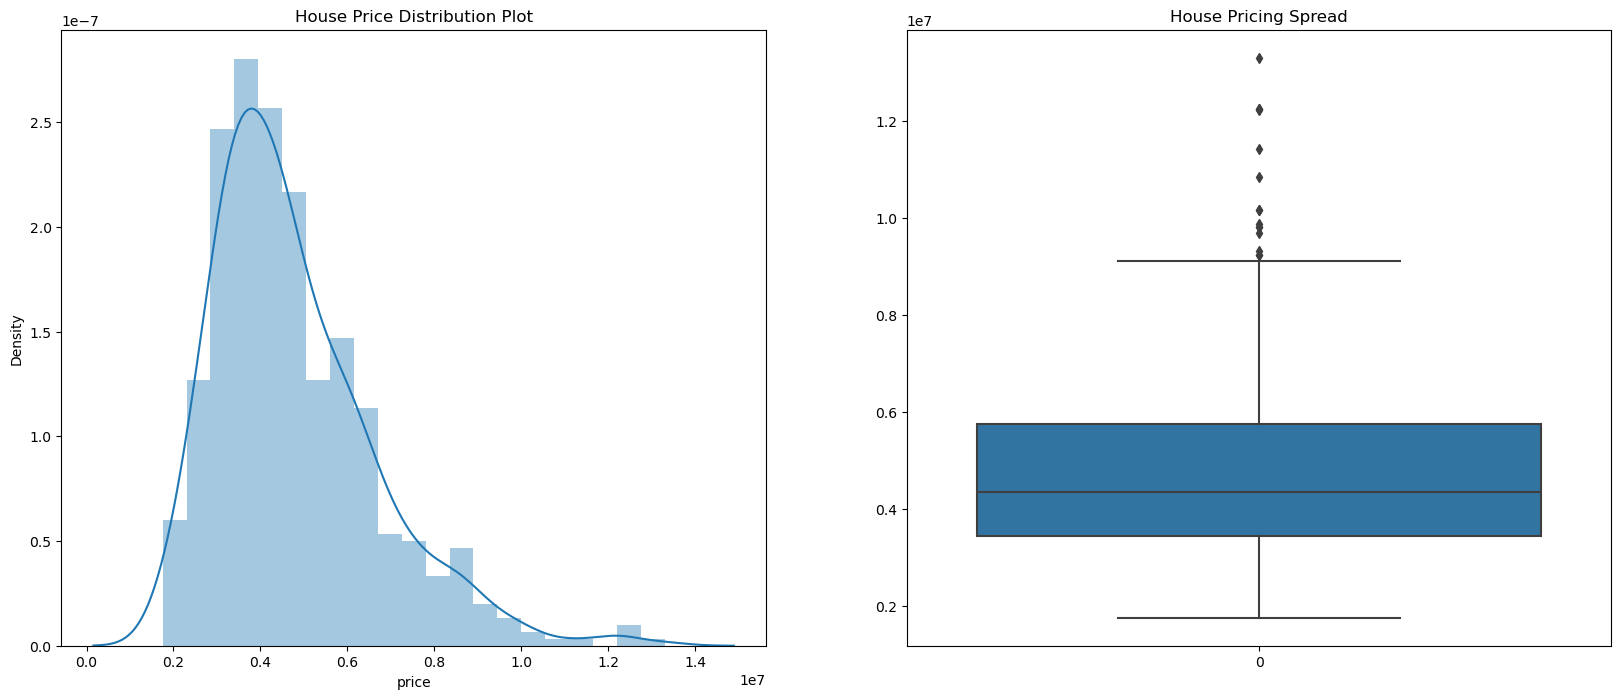

In [66]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
sns.boxplot(data.price)
plt.title('House Pricing Spread')

plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
data['mainroad'] = label_encoder.fit_transform(data['mainroad'])
data['guestroom'] = label_encoder.fit_transform(data['guestroom'])
data['hotwaterheating'] = label_encoder.fit_transform(data['hotwaterheating'])
data['airconditioning'] = label_encoder.fit_transform(data['airconditioning'])
data['prefarea'] = label_encoder.fit_transform(data['prefarea'])
data['furnishingstatus'] = ordinal_encoder.fit_transform(data[['furnishingstatus']])
data['basement'] = label_encoder.fit_transform(data['basement'])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0


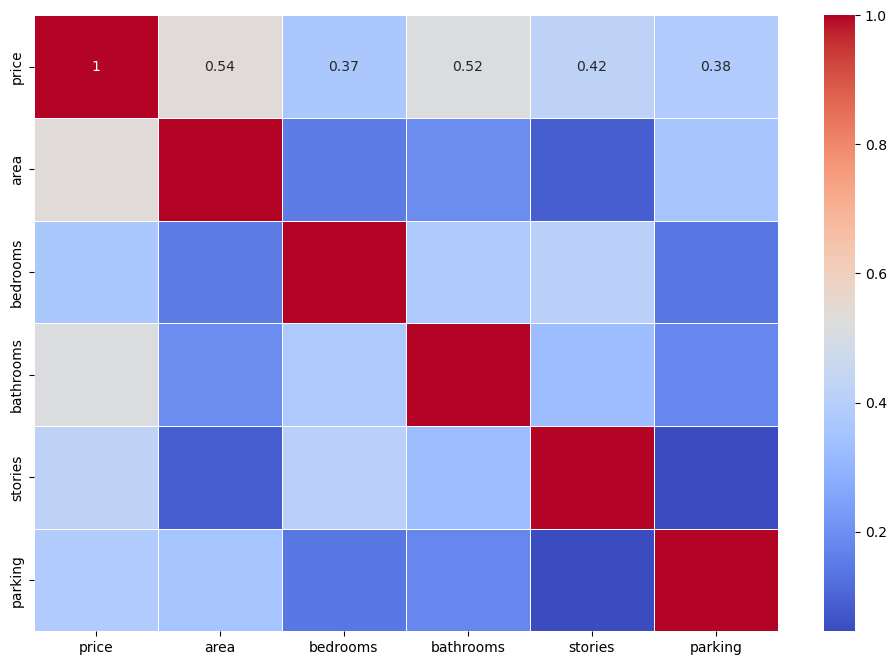

In [72]:
cor_matrix = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

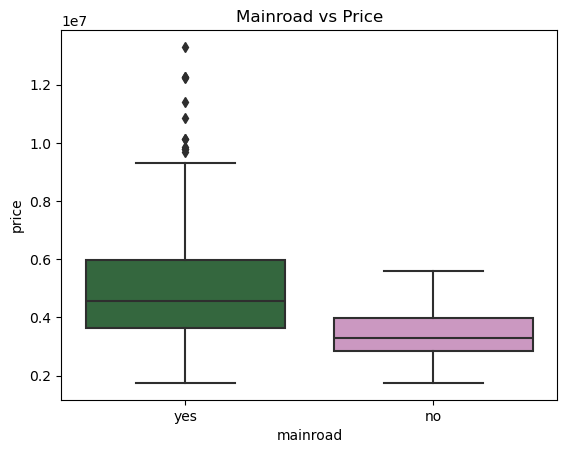

In [34]:
plt.title("Mainroad vs Price")
sns.boxplot(x=data.mainroad, y=data.price, palette=("cubehelix"))
plt.show()

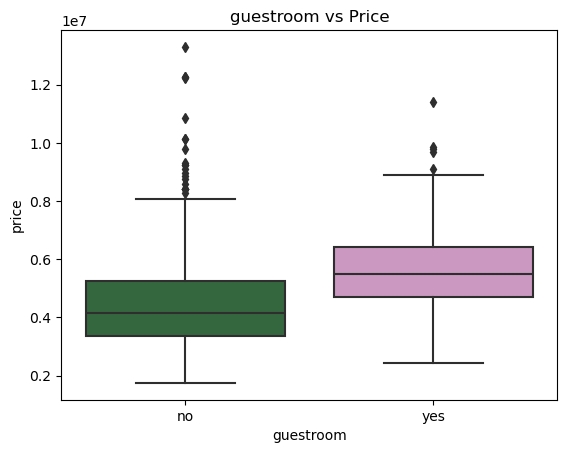

In [35]:
plt.title("guestroom vs Price")
sns.boxplot(x=data.guestroom, y=data.price, palette=("cubehelix"))
plt.show()

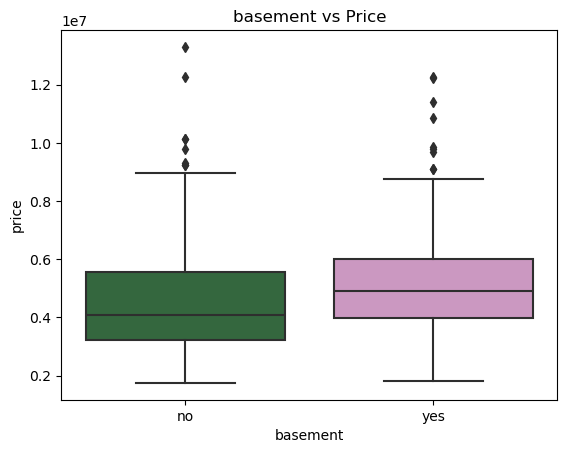

In [36]:
plt.title("basement vs Price")
sns.boxplot(x=data.basement, y=data.price, palette=("cubehelix"))
plt.show()

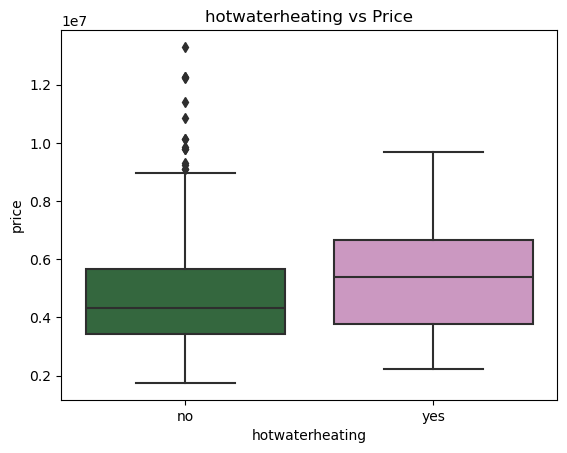

In [37]:
plt.title("hotwaterheating vs Price")
sns.boxplot(x=data.hotwaterheating, y=data.price, palette=("cubehelix"))
plt.show()

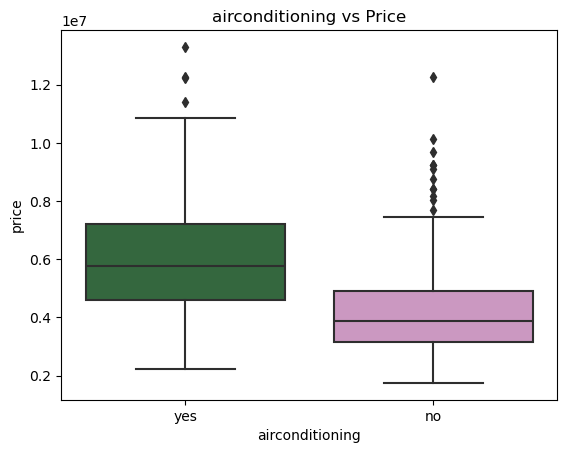

In [38]:
plt.title("airconditioning vs Price")
sns.boxplot(x=data.airconditioning, y=data.price, palette=("cubehelix"))
plt.show()

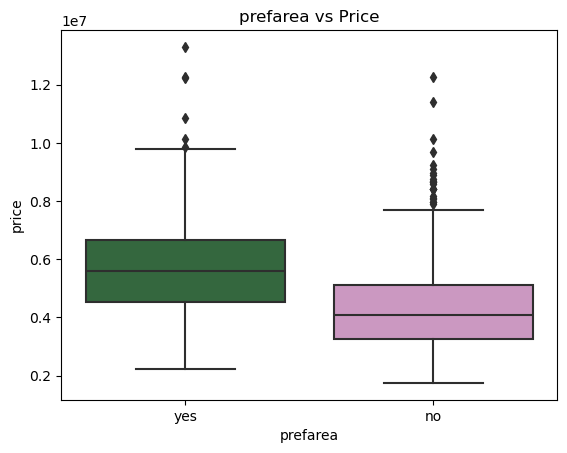

In [39]:
plt.title("prefarea vs Price")
sns.boxplot(x=data.prefarea, y=data.price, palette=("cubehelix"))
plt.show()

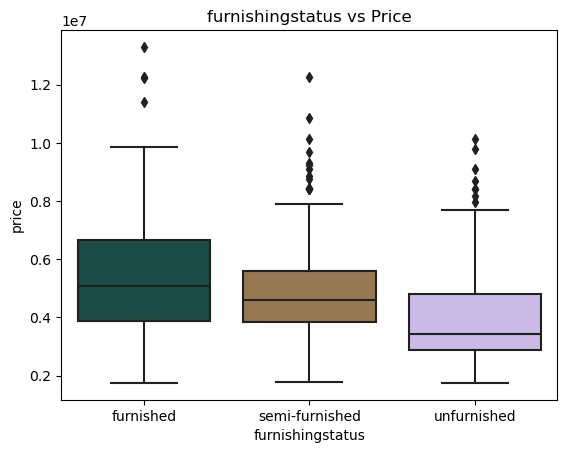

In [40]:
plt.title("furnishingstatus vs Price")
sns.boxplot(x=data.furnishingstatus, y=data.price, palette=("cubehelix"))
plt.show()

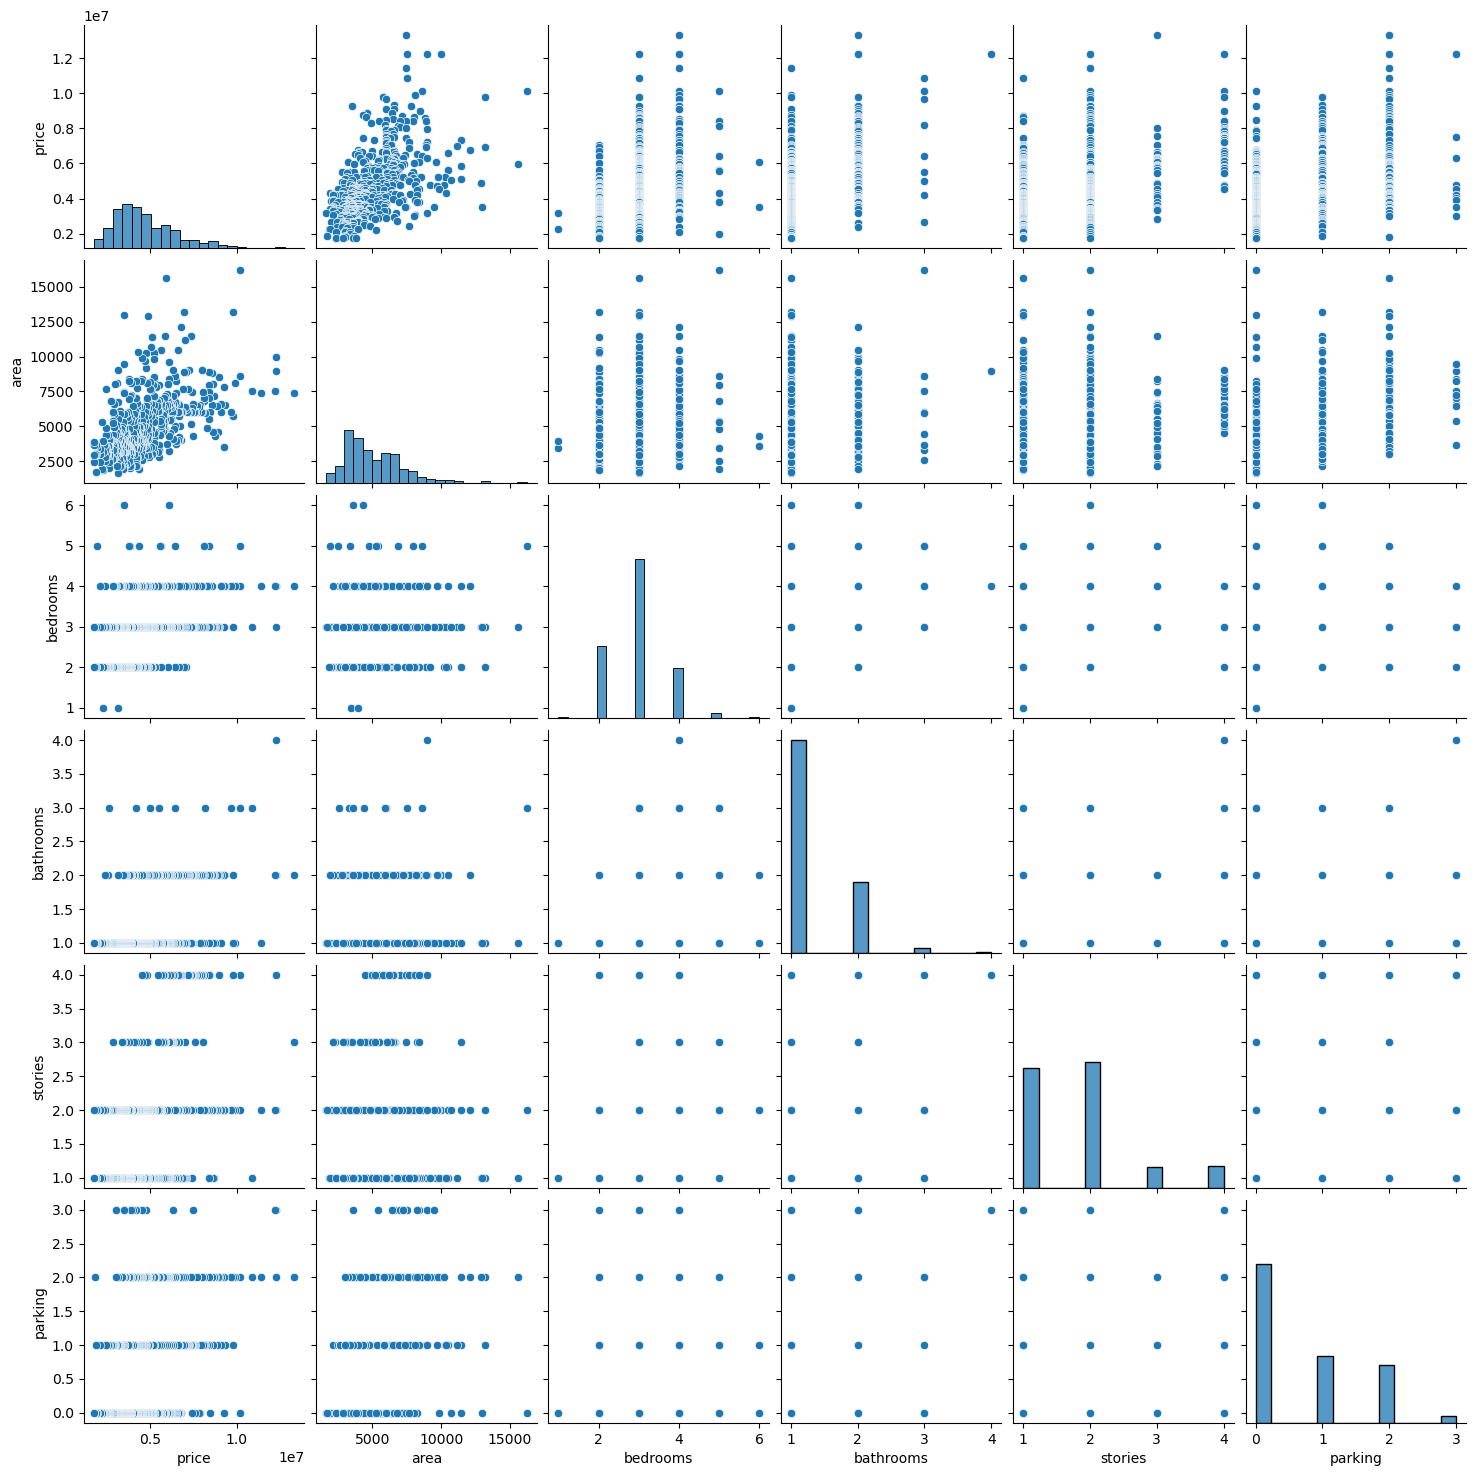

In [41]:
sns.pairplot(data)
plt.show()

In [41]:
data_categorical=[]
data_numerical=[]
data_unique=data[features].nunique().sort_values()
for i in range(data[features].shape[1]):
    if data_unique[i]<=16:
        data_categorical.append(data_unique.index[i])
    else:
        data_numerical.append(data_unique.index[i])
print(data_categorical)
print(data_numerical)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus', 'bathrooms', 'stories', 'parking', 'bedrooms']
['area']


In [42]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [43]:
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [44]:
data_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [45]:
x = data_encoded.drop('price', axis=1)
y = data_encoded['price']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [47]:
x_train.shape

(436, 13)

In [48]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred=model.predict(x_test)

In [57]:
y_pred

array([5164653.90033967, 7224722.29802167, 3109863.24240338,
       4612075.3272256 , 3294646.25725956, 3532275.09556558,
       5611774.56836476, 6368145.98732718, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847063, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612384, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930452, 5774875.21395649,
       5886993.57919884, 2730836.19518458, 4727316.47323635,
       5244847.527168  , 7555324.21605603, 3220790.84680268,
       5191898.79934207, 8143726.91009785, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701508,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365835, 3983597.27861103, 3749338.70271056,
       4274731.09125895, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

In [61]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [51]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

1754318687330.6643


In [52]:
r2=r2_score(y_test, y_pred)
print(r2)

0.6529242642153184


In [53]:
coefficient= pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coefficient)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [54]:
import pickle

with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

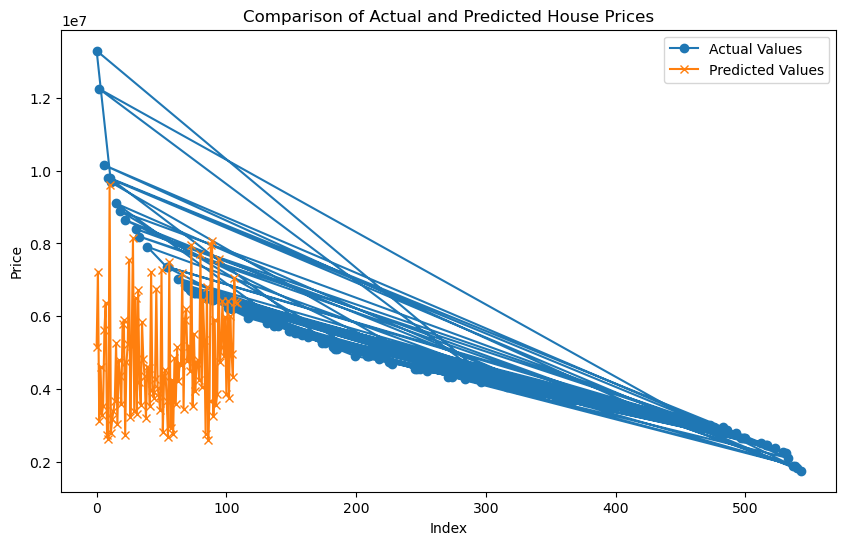

In [64]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
# Example:
# y_test = [list or array of actual values]
# y_pred = [list or array of predicted values]

plt.figure(figsize=(10, 6))

# Plot actual vs predicted values
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted House Prices')
plt.legend()

plt.show()
